# Explore here

It's recommended to use this notebook for exploration purposes.

In [5]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Fetch the HTML content of the webpage
url = "https://es.wikipedia.org/wiki/Leucocito"
response = requests.get(url)

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, "html")

# Step 3: Find a table elements in the parsed HTML
table = soup.find("table", class_= "wikitable")

# Create a DataFrame
wikitable = pd.DataFrame(columns=["Tipo", "Porcentaje aproximado en adultos"])

for row in table.find_all("tr"):
    cell = row.find_all("td")
    if (cell != []):
        Tipo = cell[0].text
        Porcentaje_aproximado_en_adultos = cell[3].text
        if "%" in Porcentaje_aproximado_en_adultos:
            wikitable = wikitable.append({"Tipo": Tipo, "Porcentaje aproximado en adultos": Porcentaje_aproximado_en_adultos}, ignore_index = True)

print(wikitable)


 

         Tipo Porcentaje aproximado en adultos
0  Neutrófilo                              62%
1  Eosinófilo                             2.3%
2    Basófilo                             0.4%
3   Linfocito                              30%
4    Monocito                             5.3%


/tmp/ipykernel_13859/2330641657.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wikitable = wikitable.append({"Tipo": Tipo, "Porcentaje aproximado en adultos": Porcentaje_aproximado_en_adultos}, ignore_index = True)
/tmp/ipykernel_13859/2330641657.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wikitable = wikitable.append({"Tipo": Tipo, "Porcentaje aproximado en adultos": Porcentaje_aproximado_en_adultos}, ignore_index = True)
/tmp/ipykernel_13859/2330641657.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wikitable = wikitable.append({"Tipo": Tipo, "Porcentaje aproximado en adultos": Porcentaje_aproximado_en_adultos}, ignore_index = True)
/tmp/ipykernel_13859/2330641657.py:29: FutureWarning: The frame.append

In [15]:
#Step 5: 
#Store the data in sqlite
import sqlite3

connection = sqlite3.connect("wikitable")
connection

#connection = sqlite3.connect("wikitable")
#cursor = connection.cursor()
#cursor.execute("DROP TABLE wikitable")

#Create a table
cursor = connection.cursor()
connection.execute("""CREATE TABLE wikitable (
               Tipo TEXT NOT NULL, 
               Porcentaje aproximado en adultos TEXT NOT NULL
               );""")

#Insert the values
connection.execute("""INSERT INTO wikitable VALUES ("Neutrófilo", "62%")""")
connection.execute("""INSERT INTO wikitable VALUES ("Eosinófilo", "2.3%")""")
connection.execute("""INSERT INTO wikitable VALUES ("Basófilo", "0.4%")""")
connection.execute("""INSERT INTO wikitable VALUES ("Linfocito", "30%")""")
connection.execute("""INSERT INTO wikitable VALUES ("Monocito", "5.3%")""")


#Almacena (commit) los cambios
connection.commit()

In [16]:
#SELECT
result_dataFrame = pd.read_sql("Select * from wikitable;", connection)
print(result_dataFrame)

         Tipo Porcentaje
0  Neutrófilo        62%
1  Eosinófilo       2.3%
2    Basófilo       0.4%
3   Linfocito        30%
4    Monocito       5.3%


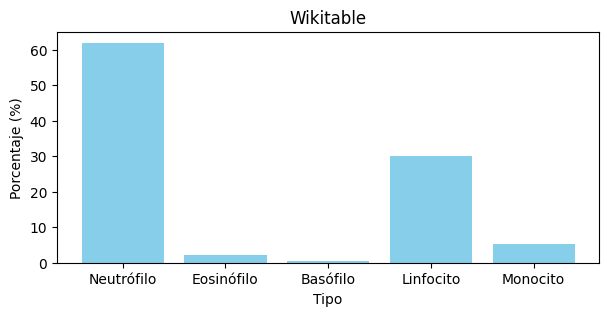

In [28]:
#Step 6: Visualize the data
#Bar plot
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Tipo': ['Neutrófilo', 'Eosinófilo', 'Basófilo', 'Linfocito', 'Monocito'],
    'Porcentaje': ['62%', '2.3%', '0.4%', '30%', '5.3%']
})

df['Porcentaje'] = df['Porcentaje'].str.rstrip('%').astype('float')

plt.figure(figsize=(7, 3))
plt.bar(df['Tipo'], df['Porcentaje'], color='skyblue')
plt.xlabel('Tipo')
plt.ylabel('Porcentaje (%)')
plt.title('Wikitable')
plt.show()

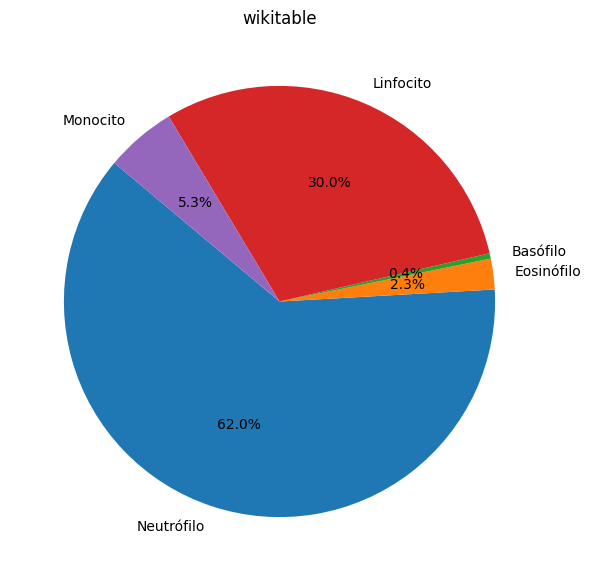

In [37]:
#Pie chart
plt.figure(figsize=(7, 7))
plt.pie(df['Porcentaje'], labels=df['Tipo'], autopct='%1.1f%%', startangle=140)
plt.title('wikitable')
plt.show()

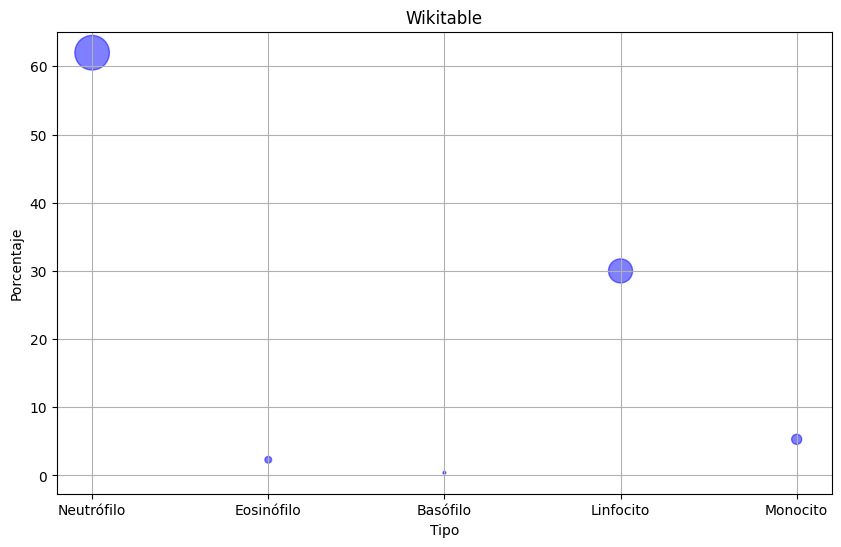

In [7]:
#Bubble chart
import matplotlib.pyplot as plt
import pandas as pd



df = pd.DataFrame({
    'Tipo': ['Neutrófilo', 'Eosinófilo', 'Basófilo', 'Linfocito', 'Monocito'],
    'Porcentaje': ['62', '2.3', '0.4', '30', '5.3']
})

# Convert Porcentaje to float for plotting
df['Porcentaje'] = df['Porcentaje'].astype(float)

plt.figure(figsize=(10, 6))
bubble_size = df['Porcentaje'] * 10  # Scale bubble size for better visibility
plt.scatter(df['Tipo'], df['Porcentaje'], s=bubble_size, alpha=0.5, color='blue')

plt.title('Wikitable')
plt.xlabel('Tipo')
plt.ylabel('Porcentaje')
plt.grid(True)
plt.show()